<a href="https://colab.research.google.com/github/cdefaz/MSCI546/blob/main/logistic_regression_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LogisticRegression

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import \
    silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score

import seaborn as sns

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA

In [2]:
# Kaggle competition: https://www.kaggle.com/competitions/digit-recognizer/data

df = pd.read_csv('/content/digits-train.csv')
features = df.loc[:, df.columns != 'label']
true_labels = df['label']
x = np.array(features)
y = np.array(true_labels)

In [9]:
print(features)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [3]:
# Split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

# Define logistic regression model
lr = LogisticRegression(verbose=2)

In [4]:
# Referenced https://medium.com/@muhammetbolat/supervised-unsupervised-techniques-on-mnist-dataset-3f2ffd4c41c5
# Referenced Tutorial 5

# Define number of folds for logisitic regression model
n_folds = 5

# Training on train.csv training subset with k fold cross-validation
# Prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# Enumerate splits
for train_ix, test_ix in kfold.split(X_train):
  # Select rows for train and test
  trainX, trainY, testX, testY = X_train[train_ix], y_train[train_ix], X_train[test_ix], y_train[test_ix]
  # Fit model
  lr.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [5]:
# Predicting on the train.csv testing subset using the trained model
X_test_prediction = lr.predict(X_test)
# print("\n")
# print(X_test_prediction)

In [6]:
# Obtaining metrics for the testing subset predictions
accuracy = round(accuracy_score(y_test, X_test_prediction), 4) * 100
precision = round(precision_score(y_test, X_test_prediction, average = 'macro'), 4) * 100
recall = round(recall_score(y_test, X_test_prediction, average = 'macro'), 4) * 100
f1_score = round(f1_score(y_test, X_test_prediction, average = 'macro'), 4) * 100
print("\n")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)



Accuracy:  90.86
Precision:  90.74
Recall:  90.77
F1 Score:  90.75


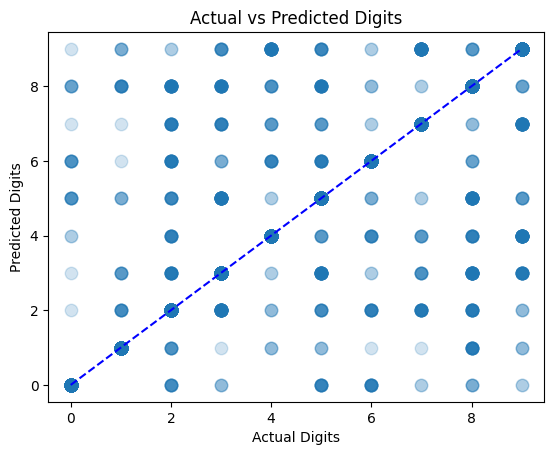

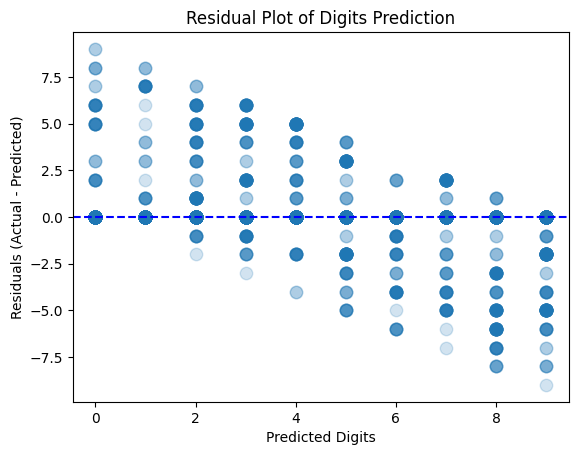

In [28]:
# Referenced https://dooinnkim.medium.com/how-to-plot-predicted-vs-actual-graphs-and-residual-plots-dc4e5b3f304a
# Referenced https://stackoverflow.com/questions/46700733/how-to-have-scatter-points-become-larger-for-higher-density-using-matplotlib
# Referenced https://stackoverflow.com/questions/59815100/add-the-y-x-line-in-a-scatter-graph

# Visualizations for the testing subset predictions

# Predicted vs. Actual
plt.scatter(y_test, X_test_prediction, s=80, alpha=0.2)
plt.xlabel('Actual Digits')
plt.ylabel('Predicted Digits')
plt.title('Actual vs Predicted Digits')
# Plot line y = x which is where Actual = Predicted
plt.plot([0, 9], [0, 9], color='b', linestyle='--') # plots line y = x
plt.show()

# Residuals plot
residuals = y_test - X_test_prediction
plt.scatter(X_test_prediction, residuals, s=80, alpha=0.2)
plt.xlabel('Predicted Digits')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot of Digits Prediction')
# Plot line y = 0 which is where residual error = 0
plt.axhline(y=0, color='b', linestyle='--')
plt.show()

In [ ]:
# Code taken from https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html

# Reducing the dataset 
pca = PCA(2) 
reduced_data = pca.fit_transform(X_test)  

lr = LogisticRegression().fit(reduced_data, y_test)

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    lr, reduced_data, response_method="predict", cmap=plt.cm.Paired, ax=ax
)
plt.title("Decision surface for sample 3 classes")
plt.axis("tight")

# Plot also the training points
colors = "bry"
for i, color in zip(lr.classes_, colors):
    idx = np.where(y_test == i)
    plt.scatter(
        reduced_data[idx, 0], reduced_data[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
    )

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = lr.coef_
intercept = lr.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(lr.classes_, colors):
    plot_hyperplane(i, color)

plt.show()